In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
pyr_four = pd.read_csv('pyr_four_nostr.csv', index_col=[0])

In [34]:
# note: no normalization has been applied
pyr_four

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,4778.608166,-648,-452,-238,825.137564,0,0
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,4534.032201,-2290,-956,-687,2574.879609,0,0
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,10174.394134,-340,-300,-11,453.564769,0,0
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,23,648518346349523993,278952,171352,840,0.044947,0.283093,Somatic,70864,42368,24,1220.157777,-62,-46,-2,77.226938,0,1
5,2633343,363328,89636,57886,961,89434,57430,935,89878,58520,982,648518346349523993,358544,231544,38440,3.868432,10.566605,Basal,70864,42368,24,24373.638977,-444,-1090,-47,1177.898553,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210970,1649818,287444,72610,37220,2135,72356,37078,2095,72840,37450,2157,648518346349492130,290440,148880,85400,3.736330,15.210989,Somatic,72944,35952,2038,1314.834210,-484,-372,-62,613.582920,0,1
210971,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,23022.738173,-900,-1576,-56,1815.740070,0,0
210972,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,10363.949247,-322,-724,-95,798.050750,0,0
210973,1654227,495816,72104,39630,1908,72006,38894,1826,72178,40170,1940,648518346349492130,288416,158520,76320,5.980140,20.961437,Somatic,72944,35952,2038,3774.941589,-172,-1276,-114,1292.577270,0,0


# From Jose Portilla Machine Learning Course (Udemy)

# Train test split

In [6]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision Tree

In [8]:
dtree = DecisionTreeClassifier()

In [9]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [10]:
#dtree.fit(X_train,y_train)
#dtree.fit(X_train,y_train)
#DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
#            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
#            min_samples_split=2, min_weight_fraction_leaf=0.0,
#            presort=False, random_state=None, splitter='best')

In [11]:
# removed presort argument which caused an error
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

DecisionTreeClassifier()

# Prediction and evaluation 

In [12]:
predictions = dtree.predict(X_test)

In [13]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.79      0.80      0.79      6007
      Axonal       0.73      0.73      0.73      3751
       Basal       0.85      0.84      0.84     16377
     Somatic       0.96      0.96      0.96     28137

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [14]:
print(confusion_matrix(y_test,predictions))

[[ 4807    71   916   213]
 [   72  2742   812   125]
 [  949   810 13796   822]
 [  263   123   797 26954]]


# Tree visualization
From Jose Portilla Machine Learning course on Udemy

In [15]:
#from IPython.display import Image  
#from sklearn.externals.six import StringIO  
#from sklearn.tree import export_graphviz
#import pydot 

#features = list(.columns[1:])
#features

In [16]:
# fixed error with deprecated sklearn.exterals.six
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydot 

import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO

In [17]:
features = list(pyr_four.columns[1:])
features

['mito_vx',
 'ctr_pos_x_vx',
 'ctr_pos_y_vx',
 'ctr_pos_z_vx',
 'bbox_beg_x_vx',
 'bbox_beg_y_vx',
 'bbox_beg_z_vx',
 'bbox_end_x_vx',
 'bbox_end_y_vx',
 'bbox_end_z_vx',
 'cellid',
 'ctr_pos_x_nm',
 'ctr_pos_y_nm',
 'ctr_pos_z_nm',
 'surface_area',
 'complexityindex',
 'compartment',
 'centroid_x',
 'centroid_y',
 'centroid_z',
 'ctr_distance_to_soma',
 'bbox_dir_x',
 'bbox_dir_y',
 'bbox_dir_z',
 'bbox_distance',
 'above_soma',
 'within_threshold_1500']

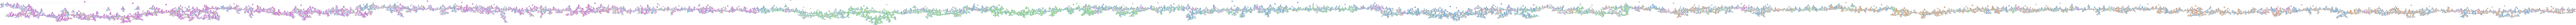

In [18]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

# Random forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
rfc_pred = rfc.predict(X_test)

In [21]:
print(confusion_matrix(y_test,rfc_pred))

[[ 4761    26   981   239]
 [   40  2931   632   148]
 [  570   432 14665   710]
 [   64    17   322 27734]]


In [22]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.88      0.79      0.83      6007
      Axonal       0.86      0.78      0.82      3751
       Basal       0.88      0.90      0.89     16377
     Somatic       0.96      0.99      0.97     28137

    accuracy                           0.92     54272
   macro avg       0.90      0.86      0.88     54272
weighted avg       0.92      0.92      0.92     54272



# check the second matrix line below; should this be classification_report instead of matrix.astype/matrix.sum?

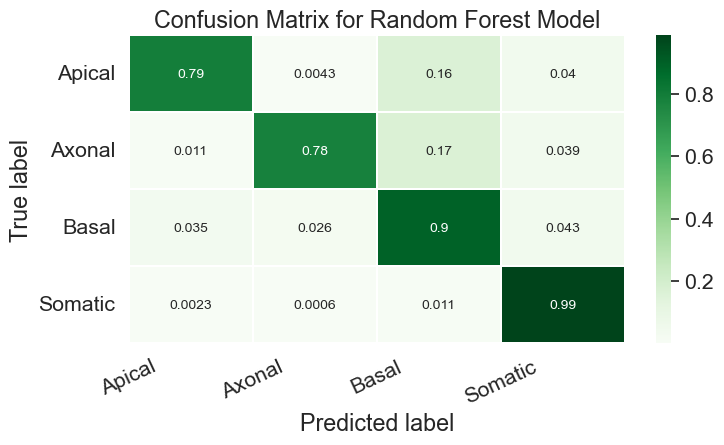

In [23]:
# from https://medium.com/analytics-vidhya/evaluating-a-random-forest-model-9d165595ad56

# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(8,4))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Apical','Axonal','Basal','Somatic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

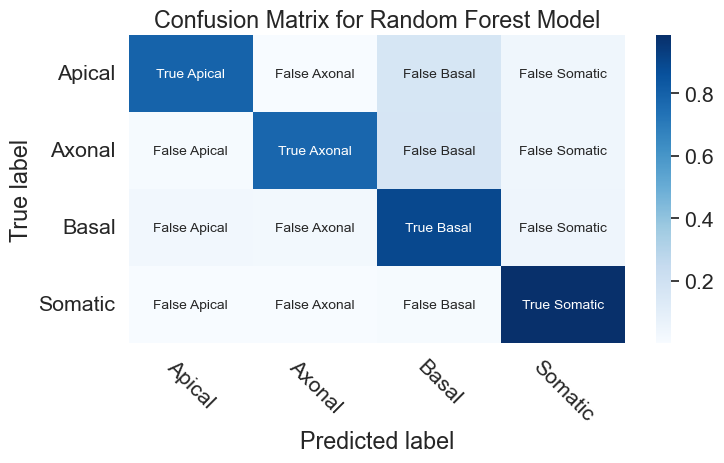

In [24]:
# from https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

labels = ['True Apical','False Axonal','False Basal','False Somatic',
          'False Apical','True Axonal','False Basal','False Somatic',
          'False Apical','False Axonal','True Basal','False Somatic',
          'False Apical','False Axonal','False Basal','True Somatic']
labels = np.asarray(labels).reshape(4,4)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=labels, annot_kws={'size':10}, fmt='', cmap='Blues')
# Add labels to the plot
class_names = ['Apical','Axonal','Basal','Somatic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=-45)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

<AxesSubplot:>

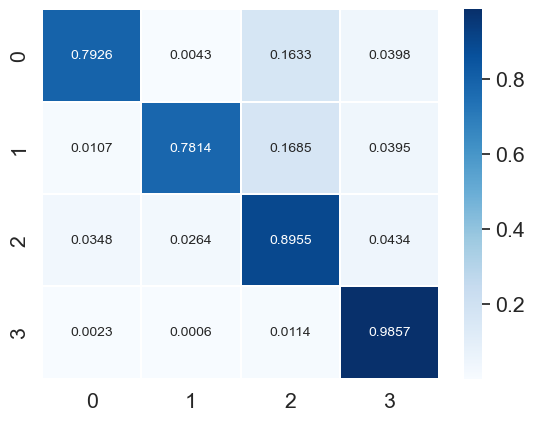

In [25]:
#sns.heatmap(matrix/np.sum(matrix), annot=True, 
#            fmt='.2%', cmap='Blues')

sns.heatmap(matrix, annot=True, annot_kws={'size':10}, fmt='.4f', cmap='Blues', linewidths=0.2)

In [26]:
# coding help from https://www.appsloveworld.com/pandas/100/31/python-remove-brackets-from-arrays
cm = confusion_matrix(y_test,rfc_pred)
coef = np.array(cm).ravel()
coef

array([ 4761,    26,   981,   239,    40,  2931,   632,   148,   570,
         432, 14665,   710,    64,    17,   322, 27734], dtype=int64)

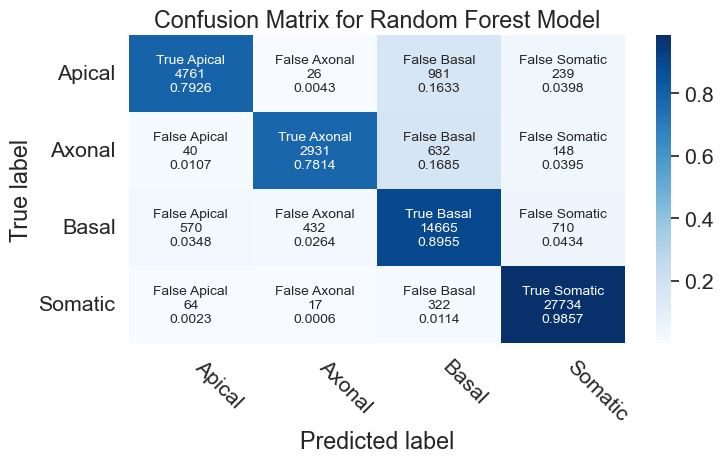

In [27]:
group_names = ['True Apical','False Axonal','False Basal','False Somatic',
          'False Apical','True Axonal','False Basal','False Somatic',
          'False Apical','False Axonal','True Basal','False Somatic',
          'False Apical','False Axonal','False Basal','True Somatic']
group_counts = ["{0:0.0f}".format(value) for value in
                coef.flatten()]
group_percentages = ["{0:.4f}".format(value) for value in
                     matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=labels, annot_kws={'size':10}, fmt='', cmap='Blues')

# Add labels to the plot
class_names = ['Apical','Axonal','Basal','Somatic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=-45, ha='left')
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [28]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.88      0.79      0.83      6007
      Axonal       0.86      0.78      0.82      3751
       Basal       0.88      0.90      0.89     16377
     Somatic       0.96      0.99      0.97     28137

    accuracy                           0.92     54272
   macro avg       0.90      0.86      0.88     54272
weighted avg       0.92      0.92      0.92     54272



# Rerun same analsys with mito to mito distance stats added

In [33]:
pyr_four_nostr_mmstats = pd.read_csv('pyr_four_nostr_mmstats.csv', index_col=[0])
pyr_four_nostr_mmstats

,mito_id,mito_vx,ctr_pos_x_vx,ctr_pos_y_vx,ctr_pos_z_vx,bbox_beg_x_vx,bbox_beg_y_vx,bbox_beg_z_vx,bbox_end_x_vx,bbox_end_y_vx,bbox_end_z_vx,cellid,ctr_pos_x_nm,ctr_pos_y_nm,ctr_pos_z_nm,surface_area,complexityindex,compartment,centroid_x,centroid_y,centroid_z,ctr_distance_to_soma,bbox_dir_x,bbox_dir_y,bbox_dir_z,bbox_distance,above_soma,within_threshold_1500,count,mean,std,min,25%,50%,75%,max,kurtosis,skew
0,1783325,527936,75186,43844,1430,74824,43668,1323,75472,44120,1561,648518346349523993,300744,175376,57200,6.187842,20.482515,Basal,70864,42368,24,4778.608166,-648,-452,-238,825.137564,0,0,196.0,7493.879886,5358.067644,0.0,4229.199053,5547.331920,9169.323781,26461.627614,4.877342,2.025797
1,1780086,1597632,75086,43678,1032,74168,43342,675,76458,44298,1362,648518346349523993,300344,174712,41280,18.720821,61.936882,Basal,70864,42368,24,4534.032201,-2290,-956,-687,2574.879609,0,0,196.0,7403.495975,5418.682808,0.0,4052.491869,5378.002393,9101.405330,26497.305071,4.935129,2.044597
2,2026719,141924,79378,47892,742,79192,47734,738,79532,48034,749,648518346349523993,317512,191568,29680,1.382960,3.164067,Basal,70864,42368,24,10174.394134,-340,-300,-11,453.564769,0,0,196.0,10724.406356,4860.556101,0.0,8462.439730,10156.453365,11852.577621,27373.207485,2.589345,1.296582
3,1540216,2780,69738,42838,21,69708,42816,21,69770,42862,23,648518346349523993,278952,171352,840,0.044947,0.283093,Somatic,70864,42368,24,1220.157777,-62,-46,-2,77.226938,0,1,196.0,6237.536731,6097.146769,0.0,1940.415856,4356.927020,8496.087586,28787.191892,5.617236,2.248441
4,2633343,363328,89636,57886,961,89434,57430,935,89878,58520,982,648518346349523993,358544,231544,38440,3.868432,10.566605,Basal,70864,42368,24,24373.638977,-444,-1090,-47,1177.898553,0,0,196.0,22841.267553,6230.086135,0.0,21593.997095,23978.281129,25593.420405,36121.573000,-1.344095,-0.237025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180899,1649818,287444,72610,37220,2135,72356,37078,2095,72840,37450,2157,648518346349492130,290440,148880,85400,3.736330,15.210989,Somatic,72944,35952,2038,1314.834210,-484,-372,-62,613.582920,0,1,209.0,7130.690469,7336.003350,0.0,994.276119,4303.812844,12012.871930,31113.030132,4.364447,1.981548
180900,2397704,336092,84174,56050,1975,83712,55254,1936,84612,56830,1992,648518346349492130,336696,224200,79000,4.604071,20.817940,Basal,72944,35952,2038,23022.738173,-900,-1576,-56,1815.740070,0,0,209.0,21084.467285,6155.821683,0.0,20184.581269,21733.447403,23581.761872,36894.681405,-0.833545,0.013475
180901,1667802,337984,72740,46280,1200,72594,45918,1153,72916,46642,1248,648518346349492130,290960,185120,48000,3.541754,9.371107,Basal,72944,35952,2038,10363.949247,-322,-724,-95,798.050750,0,0,209.0,9532.196738,4332.100257,0.0,8150.885903,9234.419310,10328.859376,24579.066398,2.620475,1.290201
180902,1654227,495816,72104,39630,1908,72006,38894,1826,72178,40170,1940,648518346349492130,288416,158520,76320,5.980140,20.961437,Somatic,72944,35952,2038,3774.941589,-172,-1276,-114,1292.577270,0,0,209.0,7038.485608,6170.602395,0.0,2679.756705,3817.004061,10301.231431,29525.049179,5.046709,2.128451


# Train test split

In [35]:
X = pyr_four.drop('compartment',axis=1)
y = pyr_four['compartment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Decision tree

In [36]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.fit(X_train,y_train)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best')

DecisionTreeClassifier()

# Predictions and evaluation

In [37]:
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      Apical       0.80      0.80      0.80      6052
      Axonal       0.72      0.74      0.73      3734
       Basal       0.85      0.84      0.85     16534
     Somatic       0.96      0.96      0.96     27952

    accuracy                           0.89     54272
   macro avg       0.83      0.83      0.83     54272
weighted avg       0.89      0.89      0.89     54272



In [38]:
print(confusion_matrix(y_test,predictions))

[[ 4812    80   924   236]
 [   62  2754   784   134]
 [  946   830 13937   821]
 [  229   141   802 26780]]


# skip tree visualization

# Random forests

In [39]:
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))

[[ 5690     6   281    75]
 [   11  3511   169    43]
 [  191   130 15997   216]
 [   20     5    83 27844]]


In [40]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      Apical       0.96      0.94      0.95      6052
      Axonal       0.96      0.94      0.95      3734
       Basal       0.97      0.97      0.97     16534
     Somatic       0.99      1.00      0.99     27952

    accuracy                           0.98     54272
   macro avg       0.97      0.96      0.97     54272
weighted avg       0.98      0.98      0.98     54272



# still need to check on line matrix line 2 below

In [44]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, rfc_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

In [45]:
cm = confusion_matrix(y_test,rfc_pred)
coef = np.array(cm).ravel()
coef

array([ 5690,     6,   281,    75,    11,  3511,   169,    43,   191,
         130, 15997,   216,    20,     5,    83, 27844], dtype=int64)

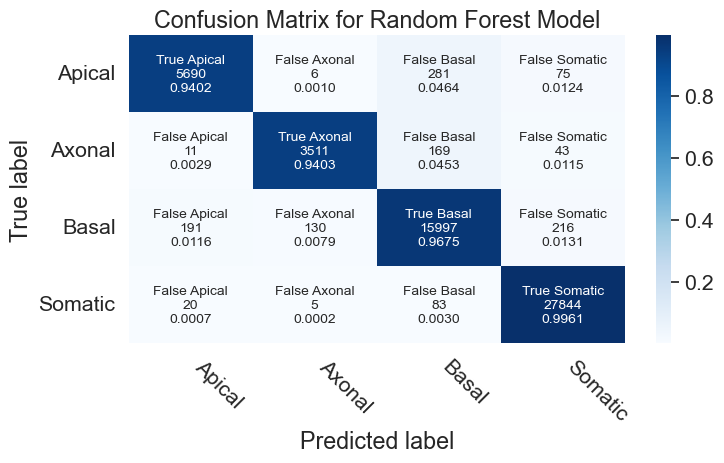

In [46]:
group_names = ['True Apical','False Axonal','False Basal','False Somatic',
          'False Apical','True Axonal','False Basal','False Somatic',
          'False Apical','False Axonal','True Basal','False Somatic',
          'False Apical','False Axonal','False Basal','True Somatic']
group_counts = ["{0:0.0f}".format(value) for value in
                coef.flatten()]
group_percentages = ["{0:.4f}".format(value) for value in
                     matrix.flatten()]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(4,4)

plt.figure(figsize=(8,4))
sns.heatmap(matrix, annot=labels, annot_kws={'size':10}, fmt='', cmap='Blues')

# Add labels to the plot
class_names = ['Apical','Axonal','Basal','Somatic']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks+0.5, class_names, rotation=-45, ha='left')
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()